In [1]:
!wget -O "dataset.zip" "https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/d5652a28-c1d8-4b76-97f3-72fb80f94efc/file_downloaded"

--2025-10-29 13:46:38--  https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/d5652a28-c1d8-4b76-97f3-72fb80f94efc/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.133.86, 162.159.130.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.133.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/d29ed9b2-8a5d-4663-8a82-c9174f2c7066 [following]
--2025-10-29 13:46:39--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/d29ed9b2-8a5d-4663-8a82-c9174f2c7066
Resolving prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)... 3.5.65.93, 52.218.93.104, 52.218.93.48, ...
Connecting to prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)|3.5.65.93|:443... c

In [2]:
!unzip /content/dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (132).JPG  
  inflating: Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1320).JPG  
  inflating: Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1321).JPG  
  inflating: Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1322).JPG  
  inflating: Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1323).JPG  
  inflating: Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1324).JPG  
  inflating: Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1325).JPG  
  inflating: Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/i

**Delete Unnecessary classes**

In [3]:
# List of directories to delete
filtered_dirs = [
    "Apple___Apple_scab",
    "Apple___Black_rot",
    "Apple___Cedar_apple_rust",
    "Apple___healthy",
    "Soybean___powdery_mildew",
    "Soybean___healthy",
    "Cherry___healthy",
    "Cherry___Powdery_mildew",
    "Blueberry___healthy",
    "Grape___Black_rot",
    "Grape___Esca_(Black_Measles)",
    "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",
    "Grape___healthy",
    "Orange___Haunglongbing_(Citrus_greening)",
    "Corn___gray_leaf_spot",
    "Corn___Common_rust",
    "Corn___healthy",
    "Corn___Northern_Leaf_Blight",
    "Corn___Cercospora_leaf_spot Gray_leaf_spot",
    "Squash___Powdery_mildew",
    "Raspberry___healthy",
    "Peach___Bacterial_spot",
    "Peach___healthy"
]

# Base path to your dataset
base_path = "/content/Plant_leave_diseases_dataset_without_augmentation/"

# Loop and delete each folder
for folder in filtered_dirs:
    folder_path = f'"{base_path}{folder}"'  # wrap path in quotes to handle spaces
    print(f"Deleting {folder_path} ...")
    !rm -rf {folder_path}

print("All selected folders deleted.")

Deleting "/content/Plant_leave_diseases_dataset_without_augmentation/Apple___Apple_scab" ...
Deleting "/content/Plant_leave_diseases_dataset_without_augmentation/Apple___Black_rot" ...
Deleting "/content/Plant_leave_diseases_dataset_without_augmentation/Apple___Cedar_apple_rust" ...
Deleting "/content/Plant_leave_diseases_dataset_without_augmentation/Apple___healthy" ...
Deleting "/content/Plant_leave_diseases_dataset_without_augmentation/Soybean___powdery_mildew" ...
Deleting "/content/Plant_leave_diseases_dataset_without_augmentation/Soybean___healthy" ...
Deleting "/content/Plant_leave_diseases_dataset_without_augmentation/Cherry___healthy" ...
Deleting "/content/Plant_leave_diseases_dataset_without_augmentation/Cherry___Powdery_mildew" ...
Deleting "/content/Plant_leave_diseases_dataset_without_augmentation/Blueberry___healthy" ...
Deleting "/content/Plant_leave_diseases_dataset_without_augmentation/Grape___Black_rot" ...
Deleting "/content/Plant_leave_diseases_dataset_without_augm

In [4]:
!pip install split-folders

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os
import splitfolders

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Dataset parameters
INPUT_DIR = "/content/Plant_leave_diseases_dataset_without_augmentation"  # Update this path to your dataset location
OUTPUT_DIR = "plantvillage_split"
IMG_SIZE = (224, 224)  # MobileNetV2 default input size
BATCH_SIZE = 32

# Split the dataset into train, validation, and test sets
print("Splitting dataset into train, validation, and test sets...")
splitfolders.ratio(
    INPUT_DIR,
    output=OUTPUT_DIR,
    seed=42,
    ratio=(0.8, 0.1, 0.1),  # 80% train, 10% validation, 10% test
    group_prefix=None,
    move=False  # Set to True if you want to move instead of copy
)

# Define paths for split datasets
train_dir = os.path.join(OUTPUT_DIR, 'train')
val_dir = os.path.join(OUTPUT_DIR, 'val')
test_dir = os.path.join(OUTPUT_DIR, 'test')

# Create data generators with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    channel_shift_range=0.2
)

# Validation generator (only rescaling)
val_datagen = ImageDataGenerator(rescale=1./255)

# Test generator (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Train generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

# Validation generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Get class names and number of classes
class_names = list(train_generator.class_indices.keys())
NUM_CLASSES = len(class_names)
print(f"Number of classes: {NUM_CLASSES}")
print(f"Class names: {class_names}")

# Display dataset sizes
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {val_generator.samples}")
print(f"Test samples: {test_generator.samples}")

Splitting dataset into train, validation, and test sets...


Copying files: 25495 files [00:07, 3540.21 files/s]


Found 20388 images belonging to 18 classes.
Found 2542 images belonging to 18 classes.
Found 2565 images belonging to 18 classes.
Number of classes: 18
Class names: ['Background_without_leaves', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']
Training samples: 20388
Validation samples: 2542
Test samples: 2565


In [6]:

# Load pre-trained MobileNetV2 model
def create_model():
    base_model = MobileNetV2(
        weights='imagenet',
        include_top=False,
        input_shape=(224, 224, 3)
    )

    # Freeze base model layers initially
    base_model.trainable = False

    # Add custom classification head
    inputs = keras.Input(shape=(224, 224, 3))
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)

    model = keras.Model(inputs, outputs)
    return model

# Create model
model = create_model()

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model architecture
model.summary()

# Callbacks
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=5,
        restore_best_weights=True
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=3,
        min_lr=1e-7
    ),
    keras.callbacks.ModelCheckpoint(
        'best_plant_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max'
    )
]

# Initial training with frozen base model
print("Initial training with frozen base layers...")
initial_epochs=20
history1 = model.fit(
    train_generator,
    epochs=initial_epochs,
    validation_data=val_generator,
    callbacks=callbacks,
    verbose=1
)



9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 18)             │         4,626 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,052,882 (11.65 MB)

 Trainable params: 793,362 (3.03 MB)

 Non-trainable params: 2,259,520 (8.62 MB)

Initial training with frozen base layers...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
638/638 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - accuracy: 0.6430 - loss: 1.1966

638/638 ━━━━━━━━━━━━━━━━━━━━ 328s 482ms/step - accuracy: 0.6432 - loss: 1.1961 - val_accuracy: 0.8202 - val_loss: 0.5204 - learning_rate: 0.0010
Epoch 2/20
638/638 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.8115 - loss: 0.5788

638/638 ━━━━━━━━━━━━━━━━━━━━ 281s 441ms/step - accuracy: 0.8115 - loss: 0.5787 - val_accuracy: 0.8572 - val_loss: 0.4296 - learning_rate: 0.0010
Epoch 3/20
638/638 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.8259 - loss: 0.5231

638/638 ━━━━━━━━━━━━━━━━━━━━ 278s 436ms/step - accuracy: 0.8259 - loss: 0.5231 - val_accuracy: 0.8639 - val_loss: 0.4074 - learning_rate: 0.0010
Epoch 4/20
638/638 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.8390 - loss: 0.4705

638/638 ━━━━━━━━━━━━━━━━━━━━ 278s 435ms/step - accuracy: 0.8390 - loss: 0.4705 - val_accuracy: 0.8800 - val_loss: 0.3523 - learning_rate: 0.0010
Epoch 5/20
638/638 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.8527 - loss: 0.4372

638/638 ━━━━━━━━━━━━━━━━━━━━ 281s 441ms/step - accuracy: 0.8527 - loss: 0.4372 - val_accuracy: 0.8820 - val_loss: 0.3295 - learning_rate: 0.0010
Epoch 6/20
638/638 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.8501 - loss: 0.4389

638/638 ━━━━━━━━━━━━━━━━━━━━ 278s 435ms/step - accuracy: 0.8501 - loss: 0.4389 - val_accuracy: 0.8961 - val_loss: 0.2997 - learning_rate: 0.0010
Epoch 7/20
638/638 ━━━━━━━━━━━━━━━━━━━━ 276s 432ms/step - accuracy: 0.8593 - loss: 0.4221 - val_accuracy: 0.8761 - val_loss: 0.3675 - learning_rate: 0.0010
Epoch 8/20
638/638 ━━━━━━━━━━━━━━━━━━━━ 276s 433ms/step - accuracy: 0.8589 - loss: 0.4144 - val_accuracy: 0.8753 - val_loss: 0.3425 - learning_rate: 0.0010
Epoch 9/20
638/638 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.8616 - loss: 0.4189

638/638 ━━━━━━━━━━━━━━━━━━━━ 279s 437ms/step - accuracy: 0.8616 - loss: 0.4189 - val_accuracy: 0.9017 - val_loss: 0.3036 - learning_rate: 0.0010
Epoch 10/20
638/638 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.8710 - loss: 0.3834

638/638 ━━━━━━━━━━━━━━━━━━━━ 282s 441ms/step - accuracy: 0.8709 - loss: 0.3834 - val_accuracy: 0.9087 - val_loss: 0.2783 - learning_rate: 0.0010
Epoch 11/20
638/638 ━━━━━━━━━━━━━━━━━━━━ 280s 438ms/step - accuracy: 0.8684 - loss: 0.3866 - val_accuracy: 0.9068 - val_loss: 0.2826 - learning_rate: 0.0010
Epoch 12/20
638/638 ━━━━━━━━━━━━━━━━━━━━ 284s 445ms/step - accuracy: 0.8655 - loss: 0.3947 - val_accuracy: 0.9001 - val_loss: 0.2893 - learning_rate: 0.0010
Epoch 13/20
638/638 ━━━━━━━━━━━━━━━━━━━━ 286s 449ms/step - accuracy: 0.8741 - loss: 0.3824 - val_accuracy: 0.9032 - val_loss: 0.2835 - learning_rate: 0.0010
Epoch 14/20
638/638 ━━━━━━━━━━━━━━━━━━━━ 285s 446ms/step - accuracy: 0.8786 - loss: 0.3594 - val_accuracy: 0.8836 - val_loss: 0.3361 - learning_rate: 0.0010
Epoch 15/20
638/638 ━━━━━━━━━━━━━━━━━━━━ 282s 442ms/step - accuracy: 0.8766 - loss: 0.3660 - val_accuracy: 0.9064 - val_loss: 0.2788 - learning_rate: 0.0010
Epoch 16/20
638/638 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.8

638/638 ━━━━━━━━━━━━━━━━━━━━ 280s 438ms/step - accuracy: 0.8815 - loss: 0.3466 - val_accuracy: 0.9111 - val_loss: 0.2609 - learning_rate: 2.0000e-04
Epoch 17/20
638/638 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.8939 - loss: 0.3211

638/638 ━━━━━━━━━━━━━━━━━━━━ 284s 445ms/step - accuracy: 0.8939 - loss: 0.3212 - val_accuracy: 0.9115 - val_loss: 0.2648 - learning_rate: 2.0000e-04
Epoch 18/20
638/638 ━━━━━━━━━━━━━━━━━━━━ 283s 443ms/step - accuracy: 0.8961 - loss: 0.3112 - val_accuracy: 0.9103 - val_loss: 0.2635 - learning_rate: 2.0000e-04
Epoch 19/20
638/638 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.8978 - loss: 0.3076

638/638 ━━━━━━━━━━━━━━━━━━━━ 280s 439ms/step - accuracy: 0.8978 - loss: 0.3077 - val_accuracy: 0.9166 - val_loss: 0.2487 - learning_rate: 2.0000e-04
Epoch 20/20
638/638 ━━━━━━━━━━━━━━━━━━━━ 278s 436ms/step - accuracy: 0.8952 - loss: 0.3016 - val_accuracy: 0.9150 - val_loss: 0.2455 - learning_rate: 2.0000e-04


In [7]:
# Fine-tuning: Unfreeze some base model layers
def unfreeze_model(model):
    # Unfreeze the top layers of the base model
    base_model = model.layers[1]
    base_model.trainable = True

    # Freeze first 100 layers and unfreeze the rest
    for layer in base_model.layers[:100]:
        layer.trainable = False
    for layer in base_model.layers[100:]:
        layer.trainable = True

    # Recompile with lower learning rate
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001/10),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
# Unfreeze and fine-tune
print("\nFine-tuning the model...")
unfreeze_model(model)

# Continue training
fine_tune_epochs=12     #29 best validation accuracy so decrase epoch 12 to 10 total = 30 instead of 32
history2 = model.fit(
    train_generator,
    epochs=initial_epochs+fine_tune_epochs,
    initial_epoch=len(history1.history['accuracy']),
    validation_data=val_generator,
    callbacks=callbacks,
    verbose=1
)


Fine-tuning the model...
Epoch 21/32
638/638 ━━━━━━━━━━━━━━━━━━━━ 324s 470ms/step - accuracy: 0.8064 - loss: 0.6096 - val_accuracy: 0.7707 - val_loss: 0.8202 - learning_rate: 1.0000e-04
Epoch 22/32
638/638 ━━━━━━━━━━━━━━━━━━━━ 281s 441ms/step - accuracy: 0.9098 - loss: 0.2668 - val_accuracy: 0.8792 - val_loss: 0.3590 - learning_rate: 1.0000e-04
Epoch 23/32
638/638 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.9336 - loss: 0.1996

638/638 ━━━━━━━━━━━━━━━━━━━━ 281s 440ms/step - accuracy: 0.9336 - loss: 0.1996 - val_accuracy: 0.9272 - val_loss: 0.2210 - learning_rate: 1.0000e-04
Epoch 24/32
638/638 ━━━━━━━━━━━━━━━━━━━━ 283s 443ms/step - accuracy: 0.9454 - loss: 0.1701 - val_accuracy: 0.9170 - val_loss: 0.2477 - learning_rate: 1.0000e-04
Epoch 25/32
638/638 ━━━━━━━━━━━━━━━━━━━━ 321s 441ms/step - accuracy: 0.9520 - loss: 0.1436 - val_accuracy: 0.9225 - val_loss: 0.2292 - learning_rate: 1.0000e-04
Epoch 26/32
638/638 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.9538 - loss: 0.1363

638/638 ━━━━━━━━━━━━━━━━━━━━ 282s 443ms/step - accuracy: 0.9538 - loss: 0.1363 - val_accuracy: 0.9406 - val_loss: 0.1994 - learning_rate: 1.0000e-04
Epoch 27/32
638/638 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.9599 - loss: 0.1238

638/638 ━━━━━━━━━━━━━━━━━━━━ 282s 443ms/step - accuracy: 0.9599 - loss: 0.1238 - val_accuracy: 0.9693 - val_loss: 0.1146 - learning_rate: 1.0000e-04
Epoch 28/32
638/638 ━━━━━━━━━━━━━━━━━━━━ 283s 442ms/step - accuracy: 0.9644 - loss: 0.1023 - val_accuracy: 0.9603 - val_loss: 0.1210 - learning_rate: 1.0000e-04
Epoch 29/32
638/638 ━━━━━━━━━━━━━━━━━━━━ 281s 441ms/step - accuracy: 0.9658 - loss: 0.1019 - val_accuracy: 0.9461 - val_loss: 0.1621 - learning_rate: 1.0000e-04
Epoch 30/32
638/638 ━━━━━━━━━━━━━━━━━━━━ 286s 448ms/step - accuracy: 0.9686 - loss: 0.0921 - val_accuracy: 0.9575 - val_loss: 0.1330 - learning_rate: 1.0000e-04
Epoch 31/32
638/638 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.9690 - loss: 0.0939

638/638 ━━━━━━━━━━━━━━━━━━━━ 286s 448ms/step - accuracy: 0.9690 - loss: 0.0939 - val_accuracy: 0.9697 - val_loss: 0.0949 - learning_rate: 1.0000e-04
Epoch 32/32
638/638 ━━━━━━━━━━━━━━━━━━━━ 285s 447ms/step - accuracy: 0.9763 - loss: 0.0741 - val_accuracy: 0.9504 - val_loss: 0.1706 - learning_rate: 1.0000e-04


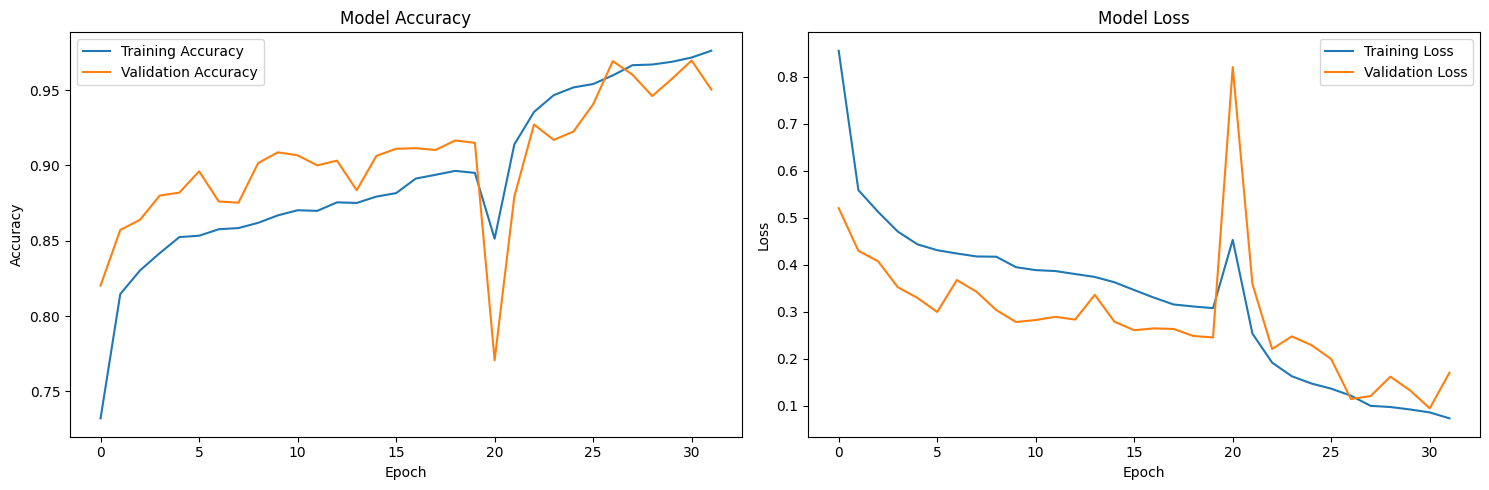


Evaluating on test set...
81/81 ━━━━━━━━━━━━━━━━━━━━ 13s 167ms/step - accuracy: 0.9802 - loss: 0.0598
Test Accuracy: 0.9778
Test Loss: 0.0641
81/81 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step

Classification Report:
                                               precision    recall  f1-score   support

                    Background_without_leaves       0.99      1.00      1.00       115
                Pepper,_bell___Bacterial_spot       0.99      0.98      0.99       101
                       Pepper,_bell___healthy       0.99      1.00      1.00       149
                        Potato___Early_blight       1.00      0.99      0.99       100
                         Potato___Late_blight       0.98      0.99      0.99       100
                             Potato___healthy       1.00      0.94      0.97        16
                     Strawberry___Leaf_scorch       0.99      1.00      1.00       112
                         Strawberry___healthy       1.00      1.00      1.00        47
        

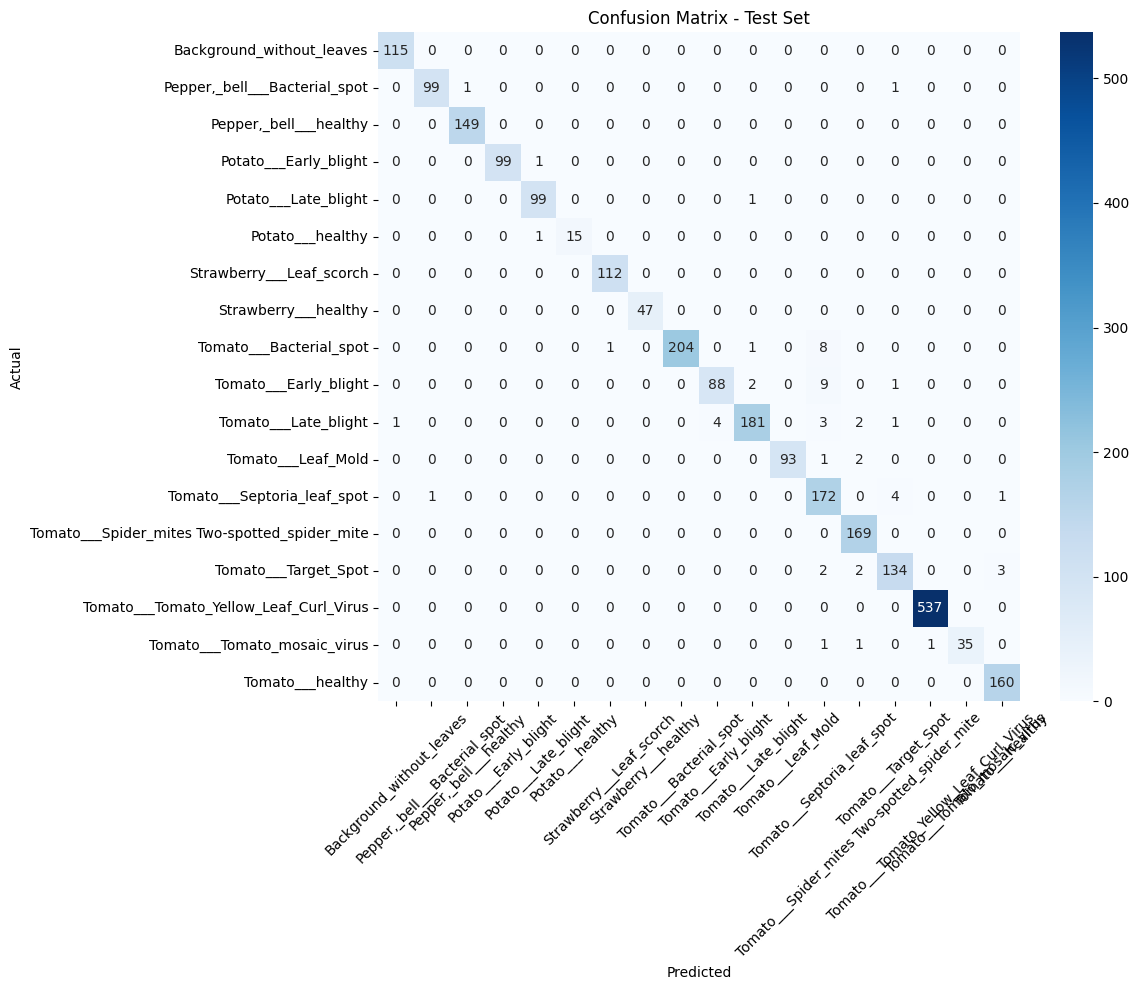


Per-class Accuracy:
Background_without_leaves: 1.0000
Pepper,_bell___Bacterial_spot: 0.9802
Pepper,_bell___healthy: 1.0000
Potato___Early_blight: 0.9900
Potato___Late_blight: 0.9900
Potato___healthy: 0.9375
Strawberry___Leaf_scorch: 1.0000
Strawberry___healthy: 1.0000
Tomato___Bacterial_spot: 0.9533
Tomato___Early_blight: 0.8800
Tomato___Late_blight: 0.9427
Tomato___Leaf_Mold: 0.9688
Tomato___Septoria_leaf_spot: 0.9663
Tomato___Spider_mites Two-spotted_spider_mite: 1.0000
Tomato___Target_Spot: 0.9504
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 1.0000
Tomato___Tomato_mosaic_virus: 0.9211
Tomato___healthy: 1.0000

Model saved as 'plant_disease_model_final.h5'
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step

Example Prediction:
Image: image (1420).JPG
Predicted: Tomato___Spider_mites Two-spotted_spider_mite
Confidence: 0.9747
Top 3 predictions:
  1. Tomato___Spider_mites Two-spotted_spider_mite: 0.9747
  2. Tomato___Target_Spot: 0.0245
  3. Tomato___Early_blight: 0.0005

Training and evaluation comple

In [8]:

# Combine histories
def combine_histories(history1, history2):
    combined_history = {}
    for key in history1.history.keys():
        combined_history[key] = history1.history[key] + history2.history[key]
    return combined_history

combined_history = combine_histories(history1, history2)

# Plot training history
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(combined_history['accuracy'], label='Training Accuracy')
plt.plot(combined_history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(combined_history['loss'], label='Training Loss')
plt.plot(combined_history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
plt.show()

# Evaluate on test set
print("\nEvaluating on test set...")
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Generate predictions on test set
test_generator.reset()
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion matrix
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate and display per-class accuracy
class_accuracy = {}
for i, class_name in enumerate(class_names):
    class_mask = y_true == i
    if np.sum(class_mask) > 0:
        class_accuracy[class_name] = np.sum(y_pred[class_mask] == i) / np.sum(class_mask)

print("\nPer-class Accuracy:")
for class_name, acc in class_accuracy.items():
    print(f"{class_name}: {acc:.4f}")

# Save the final model
model.save('plant_disease_model_final.h5')
print("\nModel saved as 'plant_disease_model_final.h5'")

# Function to predict on new images
def predict_image(image_path, model, class_names):
    img = keras.preprocessing.image.load_img(image_path, target_size=IMG_SIZE)
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch dimension
    img_array /= 255.0  # Normalize

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = np.max(predictions[0])

    # Get top 3 predictions
    top_3_indices = np.argsort(predictions[0])[-3:][::-1]
    top_3_classes = [class_names[i] for i in top_3_indices]
    top_3_confidences = [predictions[0][i] for i in top_3_indices]

    return predicted_class, confidence, top_3_classes, top_3_confidences

# Example prediction function usage
def example_prediction():
    # Find a random image from test set for demonstration
    test_files = []
    for root, dirs, files in os.walk(test_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                test_files.append(os.path.join(root, file))

    if test_files:
        random_image = np.random.choice(test_files)
        predicted_class, confidence, top_3, top_3_conf = predict_image(random_image, model, class_names)

        print(f"\nExample Prediction:")
        print(f"Image: {os.path.basename(random_image)}")
        print(f"Predicted: {predicted_class}")
        print(f"Confidence: {confidence:.4f}")
        print(f"Top 3 predictions:")
        for i, (cls, conf) in enumerate(zip(top_3, top_3_conf)):
            print(f"  {i+1}. {cls}: {conf:.4f}")

# Run example prediction
example_prediction()

print("\nTraining and evaluation completed!")
print(f"Dataset split saved in: {OUTPUT_DIR}")
print(f"Final model saved as: plant_disease_model_final.h5")

In [9]:
# This function is already included in your training code
def predict_image(image_path, model, class_names):
    img = keras.preprocessing.image.load_img(image_path, target_size=IMG_SIZE)
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch dimension
    img_array /= 255.0  # Normalize

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = np.max(predictions[0])

    return predicted_class, confidence

# Usage example
# Load your saved model and class names
model = tf.keras.models.load_model('plant_disease_model_final.h5')
class_names = list(train_generator.class_indices.keys())  # You need to save this from training

# Predict on a single image
image_path = '/content/Plant_leave_diseases_dataset_without_augmentation/Tomato___Leaf_Mold/image (170).JPG'
predicted_class, confidence = predict_image(image_path, model, class_names)
print(f"Predicted: {predicted_class}")
print(f"Confidence: {confidence:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Predicted: Tomato___Leaf_Mold
Confidence: 0.9998
